# Chapter 12 – Custom Models and Training with TensorFlow
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alirezatheh/handson-ml3-notes/blob/main/notebooks/12_custom_models_and_training_with_tensorflow.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/alirezatheh/handson-ml3-notes/blob/main/notebooks/12_custom_models_and_training_with_tensorflow.ipynb)

95% of the use cases we will encounter will not require anything other than Keras (and tf.data). But now it’s time to dive deeper into TensorFlow and take a look at its lower-level [Python API](https://homl.info/tf2api).

## A Quick Tour of TensorFlow
- TensorFlow is a powerful library for numerical computation, particularly well suited and fine-tuned for large-scale machine learning (but we can use it for anything else that requires heavy computations).
- It was developed by the Google Brain team.
- It was open sourced in November 2015.
- It is now the most widely used deep learning library in the industry (However, Facebook’s PyTorch library is currently more popular in academia. Moreover, Google’s JAX library is gaining momentum, especially in academia).

So what does TensorFlow offer? Here’s a summary:
- Its core is very similar to NumPy, but with GPU support.
- It supports distributed computing (across multiple devices and servers).
- It includes a kind of just-in-time (JIT) compiler that allows it to optimize computations for speed and memory usage. It works by extracting the computation graph from a Python function, optimizing it (e.g., by pruning unused nodes), and running it efficiently (e.g., by automatically running independent operations in parallel).
- Computation graphs can be exported to a portable format, so we can train a TensorFlow model in one environment (e.g., using Python on Linux) and run it in another (e.g., using Java on an Android device).
- It implements reverse-mode autodiff and provides some excellent optimizers, such as RMSProp and Nadam, so we can easily minimize all sorts of loss functions.
- It offers many more features built on top of these core features: 
  - The most important is of course Keras (It includes another deep learning API called the estimators API, but it is now deprecated).
  - It also has data loading and preprocessing ops (tf.data, tf.io, etc.), image processing ops (tf.image), signal processing ops (tf.signal), and more.
- If we do not want to use the Python API: there are C++, Java, and Swift APIs. There is even a JavaScript implementation called TensorFlow.js that makes it possible to run our models directly in our browser.

<center>
  <img 
    src="../images/12/tf_python_api.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

At the lowest level, each TensorFlow operation (*op* for short) is implemented using highly efficient C++ code. Many operations have multiple implementations called *kernels*: each kernel is dedicated to a specific device type, such as CPUs, GPUs, or even TPUs (*tensor processing units*).

<center>
  <img 
    src="../images/12/tf_architecture.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

GPUs can dramatically speed up computations by splitting them into many smaller chunks and running them in parallel across many GPU threads. TPUs are even faster: they are custom ASIC chips built specifically for deep learning operations (See https://homl.info/tpus).

There’s more to TensorFlow than the library. TensorFlow is at the center of an extensive ecosystem of libraries.
- First, there’s TensorBoard for visualization
- Next, there’s [TensorFlow Extended (TFX)](https://tensorflow.org/tfx), which is a set of libraries built by Google to productionize TensorFlow projects: it includes tools for data validation, preprocessing, model analysis, and serving (with TF Serving).
- Google’s TensorFlow Hub provides a way to easily download and reuse pretrained neural networks.
- We can also get many neural network architectures, some of them pretrained, in TensorFlow’s [model garden](https://github.com/tensorflow/models).
- Check out the [TensorFlow Resources](https://tensorflow.org/resources) and https://github.com/jtoy/awesome-tensorflow for more TensorFlow-based projects. 

## Using TensorFlow like NumPy
TensorFlow’s API revolves around *tensors*, which flow from operation to operation, hence the name Tensor*Flow*. A tensor is very similar to a NumPy `ndarray`: it is usually a multidimensional array, but it can also hold a scalar (a simple value, such as 42).

### Tensors and Operations

#### Tensors

In [1]:
import keras
import tensorflow as tf

# Matrix
t = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [2]:
t.shape

TensorShape([2, 3])

In [3]:
t.dtype

tf.float32

#### Indexing

In [4]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [5]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

#### Ops

In [6]:
# tf.add()
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [7]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [8]:
# tf.matmul()
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

#### Scalars

In [9]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

**Note**: Many functions and classes have aliases. e.g. `tf.add()` and `tf.math.add()` are the same function. This allows TensorFlow to have concise names for the most common operations while preserving well-organized packages. A notable exception is `tf.math.log()`, which is commonly used but doesn’t have a `tf.log()` alias, as it might be confused with logging.

#### Keras’s low-level API
We can also use Keras’s low-level API:

In [10]:
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

It’s equivalent to TF’s low-level API:

In [11]:
tf.square(tf.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

Some functions have a different name than in NumPy; e.g., `tf.reduce_mean()`, `tf.reduce_sum()`, `tf.reduce_max()`, and `tf.math.log()` are the equivalent of `np.mean()`, `np.sum()`, `np.max()`, and `np.log()`. When the name differs, there is usually a good reason for it. e.g. in TensorFlow we must write `tf.transpose(t)`; because it does not do exactly the same thing as NumPy’s `T` attribute: in TensorFlow, a new tensor is created with its own copy of the transposed data, while in NumPy, `t.T` is just a transposed view on the same data. Similarly, the `tf.reduce_sum()` operation is named this way because its GPU kernel (i.e., GPU implementation) uses a reduce algorithm that does not guarantee the order in which the elements are added: because 32-bit floats have limited precision, the result may change ever so slightly every time we call this operation.

### Tensors and NumPy

In [12]:
import numpy as np

a = np.array([2.0, 4.0, 5.0])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [13]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [14]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [15]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [16]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

**Warning**: Notice that NumPy uses 64-bit precision by default, while TensorFlow uses 32-bit. This is because 32-bit precision is generally more than enough for neural networks, plus it runs faster and uses less RAM. So when we create a tensor from a NumPy array, make sure to set `dtype=tf.float32`.

### Type Conversions
Type conversions can significantly hurt performance, and they can easily go unnoticed when they are done automatically. To avoid this, TensorFlow does not perform any type conversions automatically: it just raises an exception if we try to execute an operation on tensors with incompatible types.

In [17]:
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [18]:
try:
    tf.constant(2.0) + tf.constant(40.0, dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]


In [19]:
t2 = tf.constant(40.0, dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### Variables
The `tf.Tensor` values we’ve seen so far are immutable: we cannot modify them. This means that we cannot use regular tensors to implement weights in a neural network, since they need to be tweaked by backpropagation. What we need is a `tf.Variable`:

In [20]:
v = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [21]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [22]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [23]:
v[:, 2].assign([0.0, 1.0])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [24]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100.0, 200.0])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [25]:
# Shows how to use scatter_update()
sparse_delta = tf.IndexedSlices(
    values=[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], indices=[1, 0]
)
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

In [26]:
try:
    v[1] = [7.0, 8.0, 9.0]
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


**Note**: In practice we will rarely have to create variables manually; Keras provides an `add_weight()` method that will take care of it for us.

### Other Data Structures

#### Strings

In [27]:
tf.constant(b'hello world')

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

If we try to build a tensor with a Unicode string, TensorFlow automatically 
encodes it to UTF-8:

In [28]:
tf.constant('café')

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

It is also possible to create tensors representing Unicode strings. Just create 
an array of 32-bit integers, each representing a single Unicode code point:

In [29]:
u = tf.constant([ord(c) for c in 'café'])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

**Note**: In tensors of type `tf.string`, the string length is not part of the 
tensor’s shape. In other words, strings are considered as atomic values. 
However, in a Unicode string tensor (i.e., an int32 tensor), the length of the 
string is part of the tensor’s shape.

In [30]:
b = tf.strings.unicode_encode(u, 'UTF-8')
tf.strings.length(b, unit='UTF8_CHAR')

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [31]:
tf.strings.unicode_decode(b, 'UTF-8')

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

In [32]:
p = tf.constant(['Café', 'Coffee', 'caffè', '咖啡'])

In [33]:
tf.strings.length(p, unit='UTF8_CHAR')

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2], dtype=int32)>

In [34]:
r = tf.strings.unicode_decode(p, 'UTF8')
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>

#### Ragged tensors
A *ragged tensor* is a special kind of tensor that represents a list of arrays of different sizes. More generally, it is a tensor with one or more *ragged dimensions*, meaning dimensions whose slices may have different lengths. In the ragged tensor `r`, the second dimension is a ragged dimension. In all ragged tensors, the first dimension is always a regular dimension (also called a *uniform dimension*).

In [35]:
r[1]

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([ 67, 111, 102, 102, 101, 101], dtype=int32)>

In [36]:
# A slice of a ragged tensor is a ragged tensor
r[1:3]

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>

In [37]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
tf.concat([r, r2], axis=0)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>

In [38]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71], [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [39]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]], dtype=int32)>

#### Sparse tensors
TensorFlow can also efficiently represent *sparse tensors* (i.e., tensors containing mostly zeros).

In [40]:
s = tf.SparseTensor(
    indices=[[0, 1], [1, 0], [2, 3]],
    values=[1.0, 2.0, 3.0],
    dense_shape=[3, 4],
)

In [41]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [42]:
s * 42.0

In [43]:
try:
    s + 42.0
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [44]:
# Shows how to multiply a sparse tensor and a dense tensor
s4 = tf.constant([[10.0, 20.0], [30.0, 40.0], [50.0, 60.0], [70.0, 80.0]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

The indices must be listed in “reading order” (from left to right, and top to bottom). If we are unsure, just use `tf.sparse.reorder()`.

In [45]:
s5 = tf.SparseTensor(
    # Wrong order!
    indices=[[0, 2], [0, 1]],
    values=[1.0, 2.0],
    dense_shape=[3, 4],
)
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


2021-12-17 10:32:40.424119: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at sparse_to_dense_op.cc:162 : Invalid argument: indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.




In [46]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

#### Tensor Arrays
A `tf.TensorArray` represents a list of tensors. We can read or write tensors at any location in the array:

In [47]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1.0, 2.0]))
array = array.write(1, tf.constant([3.0, 10.0]))
array = array.write(2, tf.constant([5.0, 7.0]))
# Returns (and zeros out!) tf.constant([3., 10.])
tensor1 = array.read(1)

In [48]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

By default, reading an item also replaces it with a tensor of the same shape but full of zeros. We can set `clear_after_read` to `False` if we don’t want this.

In [49]:
array2 = tf.TensorArray(dtype=tf.float32, size=3, clear_after_read=False)
array2 = array2.write(0, tf.constant([1.0, 2.0]))
array2 = array2.write(1, tf.constant([3.0, 10.0]))
array2 = array2.write(2, tf.constant([5.0, 7.0]))
tensor2 = array2.read(1)  # returns tf.constant([3., 10.])
array2.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 1.,  2.],
       [ 3., 10.],
       [ 5.,  7.]], dtype=float32)>

**Warning**: When we write to the array, we must assign the output back to the array. If we don’t, although our code will work fine in eager mode, it will break in graph mode. these modes are discussed later in this chapter.

Alternatively, we can set `size=0` and `dynamic_size=True` to let the array grow automatically when needed. However, this will hinder performance, so if we know the size, it’s better to use a fixed-size array. All elements must have the same shape as the first one written to the array.

In [50]:
array3 = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
array3 = array3.write(0, tf.constant([1.0, 2.0]))
array3 = array3.write(1, tf.constant([3.0, 10.0]))
array3 = array3.write(2, tf.constant([5.0, 7.0]))
tensor3 = array3.read(1)
array3.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

#### Sets
TensorFlow supports sets of integers or strings (but not floats). It represents sets using regular tensors. e.g., the set `{1, 5, 9}` is just represented as the tensor `[[1, 5, 9]]`. Note that the tensor must have at least two dimensions, and the sets must be in the last dimension. e.g., `[[1, 5, 9], [2, 5, 11]]` is a tensor holding two independent sets: `{1, 5, 9}` and `{2, 5, 11}`.

In [51]:
a = tf.constant([[1, 5, 9]])
b = tf.constant([[5, 6, 9, 11]])
u = tf.sets.union(a, b)
u

In [52]:
tf.sparse.to_dense(u)

<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[ 1,  5,  6,  9, 11]], dtype=int32)>

We can also compute the union of multiple pairs of sets simultaneously. If some sets are shorter than others, we must pad them with a padding value, such as 0:

In [53]:
a = tf.constant([[1, 5, 9], [10, 0, 0]])
b = tf.constant([[5, 6, 9, 11], [13, 0, 0, 0]])
u = tf.sets.union(a, b)
tf.sparse.to_dense(u)

<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
array([[ 1,  5,  6,  9, 11],
       [ 0, 10, 13,  0,  0]], dtype=int32)>

In [54]:
# Shows how to use a different default value: -1 in this case
a = tf.constant([[1, 5, 9], [10, -1, -1]])
b = tf.constant([[5, 6, 9, 11], [13, -1, -1, -1]])
u = tf.sets.union(a, b)
tf.sparse.to_dense(u, default_value=-1)

<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
array([[ 1,  5,  6,  9, 11],
       [-1, 10, 13, -1, -1]], dtype=int32)>

In [55]:
# Shows how to use `tf.sets.difference()`
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]], dtype=int32)>

In [56]:
# Shows how to use `tf.sets.intersection()`
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]], dtype=int32)>

In [57]:
# Check whether set1[0] contains 5
tf.sets.size(tf.sets.intersection(set1[:1], tf.constant([[5, 0, 0, 0]]))) > 0

<tf.Tensor: shape=(1,), dtype=bool, numpy=array([ True])>

If we want to add some values to a set, we can compute the union of the set and the values.

#### Queues
A queue is a data structure to which we can push data records, and later pull them out. They used to be very important when implementing efficient data loading and preprocessing pipelines, but the tf.data API has essentially rendered them useless.

In [58]:
q = tf.queue.FIFOQueue(3, [tf.int32, tf.string], shapes=[(), ()])
q.enqueue([10, b'windy'])
q.enqueue([15, b'sunny'])
q.size()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [59]:
q.dequeue()

[<tf.Tensor: shape=(), dtype=int32, numpy=10>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'windy'>]

In [60]:
q.enqueue_many([[13, 16], [b'cloudy', b'rainy']])

To use `dequeue_many()`, we must specify the shapes argument when we create the 
queue, as we did previously.

In [61]:
q.dequeue_many(3)

[<tf.Tensor: shape=(3,), dtype=int32, numpy=array([15, 13, 16], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'sunny', b'cloudy', b'rainy'], dtype=object)>]

Other queue types include:
- `PaddingFIFOQueue`: Same as `FIFOQueue`, but its `dequeue_many()` method supports dequeueing multiple records of different shapes. It automatically pads the shortest records to ensure all the records in the batch have the same shape.
- `PriorityQueue`: A queue that dequeues records in a prioritized order. The priority must be a 64-bit integer included as the first element of each record. Surprisingly, records with a lower priority will be dequeued first. Records with the same priority will be dequeued in FIFO order.
- `RandomShuffleQueue`: A queue whose records are dequeued in random order. This was useful to implement a shuffle buffer before tf.data existed.

If a queue is already full and we try to enqueue another record, the `enqueue*()` method will freeze until a record is dequeued by another thread. Similarly, if a queue is empty and we try to dequeue a record, the `dequeue*()` method will freeze until records are pushed to the queue by another thread.

## Customizing Models and Training Algorithms

### Custom Loss Function

In [62]:
def huber_fn(y_true: tf.Tensor, y_pred: tf.Tensor) -> tf.Tensor:
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

Let’s plot it:

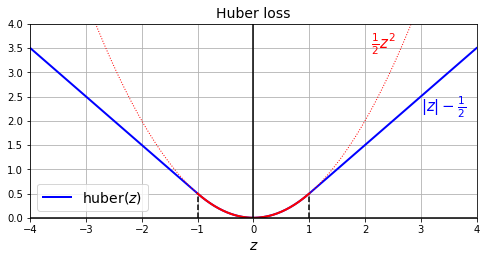

In [63]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
z_center = np.linspace(-1, 1, 200)
plt.plot(z, huber_fn(0, z), 'b-', linewidth=2, label='huber($z$)')
plt.plot(z, z**2 / 2, 'r:', linewidth=1)
plt.plot(z_center, z_center**2 / 2, 'r', linewidth=2)
plt.plot([-1, -1], [0, huber_fn(0.0, -1.0)], 'k--')
plt.plot([1, 1], [0, huber_fn(0.0, 1.0)], 'k--')
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.text(2.1, 3.5, r'$\frac{1}{2}z^2$', color='r', fontsize=15)
plt.text(3.0, 2.2, r'$|z| - \frac{1}{2}$', color='b', fontsize=15)
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel('$z$')
plt.legend(fontsize=14)
plt.title('Huber loss', fontsize=14)
plt.show()

It is also possible to return the mean loss instead of the individual sample losses, but this is not recommended as it makes it impossible to use class weights or sample weights when we need them.

To test our custom loss function, let’s create a basic Keras model and train it on the California housing dataset:

In [64]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

input_shape = X_train.shape[1:]

keras.utils.set_random_seed(42)
model = keras.Sequential(
    [
        keras.layers.Dense(
            30,
            activation='relu',
            kernel_initializer='he_normal',
            input_shape=input_shape,
        ),
        keras.layers.Dense(1),
    ],
)

In [65]:
model.compile(loss=huber_fn, optimizer='nadam', metrics=['mae'])

In [66]:
model.fit(
    X_train_scaled,
    y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid),
)

Epoch 1/2
363/363 [==============================] - 1s 969us/step - loss: 0.3970 - mae: 0.7423 - val_loss: 0.3721 - val_mae: 0.6864
Epoch 2/2
363/363 [==============================] - 0s 702us/step - loss: 0.2330 - mae: 0.5302 - val_loss: 0.2730 - val_mae: 0.5552


### Saving and Loading Models That Contain Custom Components
When we load a model containing custom objects, we need to map the names to the objects:

In [67]:
model.save('my_model_with_a_custom_loss')

INFO:tensorflow:Assets written to: my_model_with_a_custom_loss/assets


In [68]:
model = keras.models.load_model(
    'my_model_with_a_custom_loss', custom_objects={'huber_fn': huber_fn}
)

In [69]:
model.fit(
    X_train_scaled,
    y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid),
)

Epoch 1/2
363/363 [==============================] - 1s 981us/step - loss: 0.1904 - mae: 0.4699 - val_loss: 0.2363 - val_mae: 0.5045
Epoch 2/2
363/363 [==============================] - 0s 743us/step - loss: 0.1773 - mae: 0.4514 - val_loss: 0.2182 - val_mae: 0.4884


**Tip**: If we decorate the `huber_fn()` function with `@keras.utils.register_keras_serializable()`, it will automatically be available to the `load_model()` function: there’s no need to include it in the `custom_objects` dictionary.

Different threshold:

In [70]:
from typing import Callable


def create_huber(
    threshold: float = 1.0,
) -> Callable[[tf.Tensor, tf.Tensor], tf.Tensor]:
    def huber_fn(y_true: tf.Tensor, y_pred: tf.Tensor) -> tf.Tensor:
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    return huber_fn

In [71]:
model.compile(loss=create_huber(2.0), optimizer='nadam', metrics=['mae'])

In [72]:
model.fit(
    X_train_scaled,
    y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid),
)

Epoch 1/2
363/363 [==============================] - 1s 996us/step - loss: 0.1950 - mae: 0.4469 - val_loss: 0.2734 - val_mae: 0.4741
Epoch 2/2
363/363 [==============================] - 0s 744us/step - loss: 0.1909 - mae: 0.4434 - val_loss: 0.2507 - val_mae: 0.4685


Unfortunately, when we save the model, the `threshold` will not be saved.

In [73]:
model.save('my_model_with_a_custom_loss_threshold_2')

INFO:tensorflow:Assets written to: my_model_with_a_custom_loss_threshold_2/assets


In [74]:
model = keras.models.load_model(
    'my_model_with_a_custom_loss_threshold_2',
    custom_objects={'huber_fn': create_huber(2.0)},
)

In [75]:
model.fit(
    X_train_scaled,
    y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid),
)

Epoch 1/2
363/363 [==============================] - 1s 996us/step - loss: 0.1880 - mae: 0.4395 - val_loss: 0.2452 - val_mae: 0.4571
Epoch 2/2
363/363 [==============================] - 0s 755us/step - loss: 0.1858 - mae: 0.4374 - val_loss: 0.2243 - val_mae: 0.4526


We can solve this by creating a subclass of the `keras.losses.Loss` class, and then implementing its `get_config()` method:

In [76]:
from typing import Any


class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold: float = 1.0, **kwargs) -> None:
        self.threshold = threshold
        super().__init__(**kwargs)

    def call(self, y_true: tf.Tensor, y_pred: tf.Tensor) -> tf.Tensor:
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    def get_config(self) -> dict[str, Any]:
        base_config = super().get_config()
        return {**base_config, 'threshold': self.threshold}

Let’s walk through this code:
- The constructor accepts `**kwargs` and passes them to the parent constructor, which handles standard hyperparameters: the `name` of the loss and the `reduction` algorithm to use to aggregate the individual instance losses. By default this is `'AUTO'`, which is equivalent to `'SUM_OVER_BATCH_SIZE'`: the loss will be the sum of the instance losses, weighted by the sample weights, if any, and divided by the batch size (not by the sum of weights, so this is not the weighted mean. It would not be a good idea to use a weighted mean: if we did, then two instances with the same weight but in different batches would have a different impact on training, depending on the total weight of each batch). Other possible values are `'SUM'` and `'NONE'`.
- The `call()` method takes the labels and predictions, computes all the instance losses, and returns them.
- The `get_config()` method returns a dictionary mapping each hyperparameter name to its value.

In [77]:
# Creates another basic Keras model
keras.utils.set_random_seed(42)
model = keras.Sequential(
    [
        keras.layers.Dense(
            30,
            activation='relu',
            kernel_initializer='he_normal',
            input_shape=input_shape,
        ),
        keras.layers.Dense(1),
    ],
)

In [78]:
model.compile(loss=HuberLoss(2.0), optimizer='nadam', metrics=['mae'])

In [79]:
model.fit(
    X_train_scaled,
    y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid),
)

Epoch 1/2
363/363 [==============================] - 1s 985us/step - loss: 0.4997 - mae: 0.7514 - val_loss: 0.5202 - val_mae: 0.6936
Epoch 2/2
363/363 [==============================] - 0s 753us/step - loss: 0.2781 - mae: 0.5435 - val_loss: 0.3794 - val_mae: 0.5651


In [80]:
model.save('my_model_with_a_custom_loss_class')

INFO:tensorflow:Assets written to: my_model_with_a_custom_loss_class/assets


In [81]:
model = keras.models.load_model(
    'my_model_with_a_custom_loss_class',
    custom_objects={'HuberLoss': HuberLoss},
)

In [82]:
# Shows that loading worked fine, the model can be used normally
model.fit(
    X_train_scaled,
    y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid),
)

Epoch 1/2
363/363 [==============================] - 1s 981us/step - loss: 0.2206 - mae: 0.4783 - val_loss: 0.3241 - val_mae: 0.5093
Epoch 2/2
363/363 [==============================] - 0s 760us/step - loss: 0.2018 - mae: 0.4574 - val_loss: 0.2909 - val_mae: 0.4934


In [83]:
# The treshold was loaded correctly
model.loss.threshold

2.0

### Custom Activation Functions, Initializers, Regularizers, and Constraints

In [84]:
def my_softplus(z: tf.Tensor) -> tf.Tensor:
    return tf.math.log(1.0 + tf.exp(z))


def my_glorot_initializer(
    shape: tf.TensorShape, dtype: tf.DType = tf.float32
) -> tf.Tensor:
    stddev = tf.sqrt(2.0 / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)


def my_l1_regularizer(weights: tf.Variable) -> tf.Tensor:
    return tf.reduce_sum(tf.abs(0.01 * weights))


def my_positive_weights(weights: tf.Variable) -> tf.Tensor:
    # Return value is just tf.nn.relu(weights)
    return tf.where(weights < 0.0, tf.zeros_like(weights), weights)

In [85]:
layer = keras.layers.Dense(
    1,
    activation=my_softplus,
    kernel_initializer=my_glorot_initializer,
    kernel_regularizer=my_l1_regularizer,
    kernel_constraint=my_positive_weights,
)

In [86]:
# Show that building, training, saving, loading, and training again
# works fine with a model containing many custom parts

keras.utils.set_random_seed(42)
model = keras.Sequential(
    [
        keras.layers.Dense(
            30,
            activation='relu',
            kernel_initializer='he_normal',
            input_shape=input_shape,
        ),
        keras.layers.Dense(
            1,
            activation=my_softplus,
            kernel_initializer=my_glorot_initializer,
            kernel_regularizer=my_l1_regularizer,
            kernel_constraint=my_positive_weights,
        ),
    ],
)
model.compile(loss='mse', optimizer='nadam', metrics=['mae'])
model.fit(
    X_train_scaled,
    y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid),
)
model.save('my_model_with_many_custom_parts')
model = keras.models.load_model(
    'my_model_with_many_custom_parts',
    custom_objects={
        'my_l1_regularizer': my_l1_regularizer,
        'my_positive_weights': my_positive_weights,
        'my_glorot_initializer': my_glorot_initializer,
        'my_softplus': my_softplus,
    },
)
model.fit(
    X_train_scaled,
    y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid),
)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 1.1668 - mae: 0.7430 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 0s 750us/step - loss: 0.7359 - mae: 0.5977 - val_loss: 2.6252 - val_mae: 0.5870
INFO:tensorflow:Assets written to: my_model_with_many_custom_parts/assets


INFO:tensorflow:Assets written to: my_model_with_many_custom_parts/assets


Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.5646 - mae: 0.5293 - val_loss: 0.9063 - val_mae: 0.5070
Epoch 2/2
363/363 [==============================] - 0s 759us/step - loss: 0.4981 - mae: 0.4975 - val_loss: 0.7695 - val_mae: 0.4918


If a function has hyperparameters that need to be saved along with the model:

In [87]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor: float) -> None:
        self.factor = factor

    def __call__(self, weights: tf.Variable) -> tf.Tensor:
        return tf.reduce_sum(tf.abs(self.factor * weights))

    def get_config(self) -> dict[str, Any]:
        return {'factor': self.factor}

Note that we must implement the `call()` method for losses, layers (including activation functions), and models, or the `__call__()` method for regularizers, initializers, and constraints.

In [88]:
# Again, show that everything works fine, this time using our custom
# regularizer class


keras.utils.set_random_seed(42)
model = keras.Sequential(
    [
        keras.layers.Dense(
            30,
            activation='relu',
            kernel_initializer='he_normal',
            input_shape=input_shape,
        ),
        keras.layers.Dense(
            1,
            activation=my_softplus,
            kernel_regularizer=MyL1Regularizer(0.01),
            kernel_constraint=my_positive_weights,
            kernel_initializer=my_glorot_initializer,
        ),
    ],
)
model.compile(loss='mse', optimizer='nadam', metrics=['mae'])
model.fit(
    X_train_scaled,
    y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid),
)
model.save('my_model_with_many_custom_parts')
model = keras.models.load_model(
    'my_model_with_many_custom_parts',
    custom_objects={
        'MyL1Regularizer': MyL1Regularizer,
        'my_positive_weights': my_positive_weights,
        'my_glorot_initializer': my_glorot_initializer,
        'my_softplus': my_softplus,
    },
)
model.fit(
    X_train_scaled,
    y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid),
)

Epoch 1/2
363/363 [==============================] - 1s 992us/step - loss: 1.1668 - mae: 0.7430 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 0s 752us/step - loss: 0.7359 - mae: 0.5977 - val_loss: 2.6252 - val_mae: 0.5870
INFO:tensorflow:Assets written to: my_model_with_many_custom_parts/assets
Epoch 1/2
363/363 [==============================] - 1s 980us/step - loss: 0.5646 - mae: 0.5293 - val_loss: 0.9063 - val_mae: 0.5070
Epoch 2/2
363/363 [==============================] - 0s 783us/step - loss: 0.4981 - mae: 0.4975 - val_loss: 0.7695 - val_mae: 0.4918


### Custom Metrics
Losses and metrics are conceptually not the same thing: losses (e.g., cross entropy) are used by gradient descent to *train* a model, so they must be differentiable (at least at the points where they are evaluated), and their gradients should not be zero everywhere. Plus, it’s OK if they are not easily interpretable by humans. In contrast, metrics (e.g., accuracy) are used to *evaluate* a model: they must be more easily interpretable, and they can be nondifferentiable or have zero gradients everywhere.

That said, in most cases, defining a custom metric function is exactly the same as defining a custom loss function.

In [89]:
# Once again, let’s create a basic Keras model
keras.utils.set_random_seed(42)
model = keras.Sequential(
    [
        keras.layers.Dense(
            30,
            activation='relu',
            kernel_initializer='he_normal',
            input_shape=input_shape,
        ),
        keras.layers.Dense(1),
    ],
)

In [90]:
model.compile(loss='mse', optimizer='nadam', metrics=[create_huber(2.0)])

In [91]:
# Train the model with our custom metric
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 596us/step - loss: 1.3734 - huber_fn: 0.5275
Epoch 2/2
363/363 [==============================] - 0s 556us/step - loss: 0.7705 - huber_fn: 0.3166


**Note**: If we use the same function as the loss and a metric, we may be surprised to see slightly different results. This is in part because the operations are not computed exactly in the same order, so there might be tiny floating point errors. More importantly, if we use sample weights or class weights, then the equations are a bit different:
- The `fit()` method keeps track of the mean of all batch losses seen so far since the start of the epoch. Each batch loss is the sum of the weighted instance losses divided by the *batch size* (not the sum of weights, so the batch loss is *not* the weighted mean of the losses).
- The metric since the start of the epoch is equal to the sum of weighted instance losses divided by sum of all weights seen so far. In other words, it is the weighted mean of all the instance losses. Not the same thing.

#### Streaming metrics
For each batch during training, Keras will compute this metric and keep track of its mean since the beginning of the epoch. Most of the time, this is exactly what we want. But not always! Consider a binary classifier’s precision. Suppose the model made five positive predictions in the first batch, four of which were correct: that’s 80% precision. Then suppose the model made three positive predictions in the second batch, but they were all incorrect: that’s 0% precision for the second batch. If we just compute the mean of these two precisions, we get 40%. But that’s not the model’s precision over these two batches! Indeed, there were a total of four true positives (4 + 0) out of eight positive predictions (5 + 3), so the overall precision is 50%. What we need is an object that can keep track of the number of true positives and the number of false positives and that can compute the precision based on these numbers when requested. This is precisely what the `keras.metrics.Precision` class does.This is called a *streaming metric* (or *stateful metric*)

In [92]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [93]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [94]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [95]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [96]:
precision.reset_states()

Creating a custom streaming metric:

In [97]:
from typing import Optional


class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold: float = 1.0, **kwargs) -> None:
        # Handles base args (e.g., dtype)
        super().__init__(**kwargs)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight('total', initializer='zeros')
        self.count = self.add_weight('count', initializer='zeros')

    def update_state(
        self,
        y_true: tf.Tensor,
        y_pred: tf.Tensor,
        sample_weight: Optional[tf.Tensor] = None,
    ) -> None:
        sample_metrics = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(sample_metrics))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))

    def result(self) -> tf.Tensor:
        return self.total / self.count

    def get_config(self) -> dict[str, Any]:
        base_config = super().get_config()
        return {**base_config, 'threshold': self.threshold}

Let’s walk through this code:
- The constructor uses the `add_weight()` method to create the variables needed to keep track of the metric’s state over multiple batches. We could just create variables manually if we preferred. Keras tracks any `tf.Variable` that is set as an attribute (and more generally, any “trackable” object, such as layers or models).
- The `update_state()` method is called when we use an instance of this class as a function.
- When we use the metric as a function, the `update_state()` method gets called first, then the `result()` method is called, and its output is returned.
- The default implementation of the `reset_states()` method resets all variables to 0.0.

When we define a metric using a simple function, Keras automatically calls it for each batch, and it keeps track of the mean during each epoch, just like we did manually. So the only benefit of our `HuberMetric` class is that the `threshold` will be saved. 

**Extra material**: The rest of this section tests the `HuberMetric` class and shows another implementation subclassing `keras.metrics.Mean`.

In [98]:
m = HuberMetric(2.0)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.0]]), tf.constant([[10.0]]))

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [99]:
# total += (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count += 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.0], [5.0]]), tf.constant([[1.0], [9.25]]))

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [100]:
m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [101]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [102]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

Let’s check that the `HuberMetric` class works well:

In [103]:
keras.utils.set_random_seed(42)
model = keras.Sequential(
    [
        keras.layers.Dense(
            30,
            activation='relu',
            kernel_initializer='he_normal',
            input_shape=input_shape,
        ),
        keras.layers.Dense(1),
    ],
)

In [104]:
model.compile(
    loss=create_huber(2.0), optimizer='nadam', metrics=[HuberMetric(2.0)]
)

In [105]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 587us/step - loss: 0.4997 - huber_metric_10: 0.4997
Epoch 2/2
363/363 [==============================] - 0s 574us/step - loss: 0.2781 - huber_metric_10: 0.2781


In [106]:
model.save('my_model_with_a_custom_metric')

INFO:tensorflow:Assets written to: my_model_with_a_custom_metric/assets


In [107]:
model = keras.models.load_model(
    'my_model_with_a_custom_metric',
    custom_objects={'huber_fn': create_huber(2.0), 'HuberMetric': HuberMetric},
)

In [108]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 625us/step - loss: 0.2206 - huber_metric_10: 0.2206
Epoch 2/2
363/363 [==============================] - 0s 609us/step - loss: 0.2018 - huber_metric_10: 0.2018


`model.metrics` contains the model’s loss followed by the model’s metric(s), so the `HuberMetric` is `model.metrics[-1]`:

In [109]:
model.metrics[-1].threshold

2.0

Looks like it works fine! More simply, we could have created the class like 
this:

In [110]:
class HuberMetric(keras.metrics.Mean):
    def __init__(
        self,
        threshold: float = 1.0,
        name: str = 'HuberMetric',
        dtype: Optional[tf.DType] = None,
    ) -> None:
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)

    def update_state(
        self,
        y_true: tf.Tensor,
        y_pred: tf.Tensor,
        sample_weight: Optional[tf.Tensor] = None,
    ) -> None:
        metric = self.huber_fn(y_true, y_pred)
        super().update_state(metric, sample_weight)

    def get_config(self) -> dict[str, Any]:
        base_config = super().get_config()
        return {**base_config, 'threshold': self.threshold}

This class handles shapes better, and it also supports sample weights.

In [111]:
keras.utils.set_random_seed(42)
model = keras.Sequential(
    [
        keras.layers.Dense(
            30,
            activation='relu',
            kernel_initializer='he_normal',
            input_shape=input_shape,
        ),
        keras.layers.Dense(1),
    ],
)

In [112]:
model.compile(
    loss=keras.losses.Huber(2.0),
    optimizer='nadam',
    weighted_metrics=[HuberMetric(2.0)],
)

In [113]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(
    X_train_scaled, y_train, epochs=2, sample_weight=sample_weight
)

Epoch 1/2
363/363 [==============================] - 1s 645us/step - loss: 0.2505 - HuberMetric: 0.5049
Epoch 2/2
363/363 [==============================] - 0s 635us/step - loss: 0.1416 - HuberMetric: 0.2854


In [114]:
(
    history.history['loss'][0],
    history.history['HuberMetric'][0] * sample_weight.mean(),
)

(0.2505398094654083, 0.2505398573110885)

In [115]:
model.save('my_model_with_a_custom_metric_v2')

INFO:tensorflow:Assets written to: my_model_with_a_custom_metric_v2/assets


In [116]:
model = keras.models.load_model(
    'my_model_with_a_custom_metric_v2',
    custom_objects={'HuberMetric': HuberMetric},
)

In [117]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 665us/step - loss: 0.2257 - HuberMetric: 0.2257
Epoch 2/2
363/363 [==============================] - 0s 628us/step - loss: 0.2034 - HuberMetric: 0.2034


In [118]:
model.metrics[-1].threshold

2.0

### Custom Layers
We may want to build:
- An architecture that contains an exotic layer for which TensorFlow does not provide a default implementation.
- A very repetitive architecture, in which a particular block of layers is repeated many times.

Create a layer that have no weights:

In [119]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [120]:
# Like all layers, it can be used as a function:
exponential_layer([-1.0, 0.0, 1.0])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

Adding an exponential layer at the output of a regression model can be useful if the values to predict are positive and with very different scales (e.g., 0.001, 10., 10000).

In [121]:
keras.utils.set_random_seed(42)
model = keras.Sequential(
    [
        keras.layers.Dense(30, activation='relu', input_shape=input_shape),
        keras.layers.Dense(1),
        exponential_layer,
    ]
)
model.compile(loss='mse', optimizer='sgd')
model.fit(
    X_train_scaled,
    y_train,
    epochs=5,
    validation_data=(X_valid_scaled, y_valid),
)
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 0s 845us/step - loss: 1.0631 - val_loss: 0.4457
Epoch 2/5
363/363 [==============================] - 0s 591us/step - loss: 0.4562 - val_loss: 0.3798
Epoch 3/5
363/363 [==============================] - 0s 585us/step - loss: 0.4029 - val_loss: 0.3548
Epoch 4/5
363/363 [==============================] - 0s 597us/step - loss: 0.3851 - val_loss: 0.3464
Epoch 5/5
162/162 [==============================] - 0s 427us/step - loss: 0.3586


0.3586341440677643

Alternatively, it’s often preferable to replace the targets with the logarithm of the targets (and use no activation function in the output layer).

In [122]:
class MyDense(keras.layers.Layer):
    def __init__(
        self, units: int, activation: Optional[Callable | str] = None, **kwargs
    ) -> None:
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(
        self,
        # The Keras API calls this argument input_shape, but since it
        # also includes the batch dimension, I prefer to call it
        # batch_input_shape.
        batch_input_shape: tf.TensorShape,
    ) -> None:
        self.kernel = self.add_weight(
            name='kernel',
            shape=[batch_input_shape[-1], self.units],
            initializer='he_normal',
        )
        self.bias = self.add_weight(
            name='bias', shape=[self.units], initializer='zeros'
        )

    def call(self, X: tf.Tensor) -> tf.Tensor:
        return self.activation(X @ self.kernel + self.bias)

    def get_config(self) -> dict[str, Any]:
        base_config = super().get_config()
        return {
            **base_config,
            'units': self.units,
            'activation': keras.activations.serialize(self.activation),
        }

Let’s walk through this code:
- The constructor takes all the hyperparameters as arguments (in this example, `units` and `activation`), and importantly it also takes a `**kwargs` argument. It calls the parent constructor, passing it the `kwargs`: this takes care of standard arguments such as `input_shape`, `trainable`, and `name`. Then it saves the hyperparameters as attributes, converting the `activation` argument to the appropriate activation function using the `keras.activations.get()` function (it accepts functions, standard strings like `'relu'` or `'swish'`, or simply `None`).
- The `build()` method’s role is to create the layer’s variables by calling the `add_weight()` method for each weight. The `build()` method is called the first time the layer is *used*. At that point, Keras will know the shape of this layer’s inputs, and it will pass it to the `build()` method, which is often necessary to create some of the weights. e.g. we need to know the number of neurons in the previous layer in order to create the connection weights matrix (i.e., the `'kernel'`): this corresponds to the size of the last dimension of the inputs.
- The `call()` method performs the desired operations.
- The `get_config()` method is just like in the previous custom classes.

**Note**: Keras automatically infers the output shape, except when the layer is dynamic. In this (rare) case, we need to implement the `compute_output_shape()` method, which must return a `TensorShape` object.

In [123]:
# Shows that a custom layer can be used normally
keras.utils.set_random_seed(42)
model = keras.Sequential(
    [MyDense(30, activation='relu', input_shape=input_shape), MyDense(1)],
)
model.compile(loss='mse', optimizer='nadam')
model.fit(
    X_train_scaled,
    y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid),
)
model.evaluate(X_test_scaled, y_test)
model.save('my_model_with_a_custom_layer')

Epoch 1/2
363/363 [==============================] - 1s 836us/step - loss: 2.8036 - val_loss: 2.9430
Epoch 2/2
162/162 [==============================] - 0s 426us/step - loss: 0.6557
INFO:tensorflow:Assets written to: my_model_with_a_custom_layer/assets


In [124]:
# Shows how to load a model with a custom layer
model = keras.models.load_model(
    'my_model_with_a_custom_layer', custom_objects={'MyDense': MyDense}
)
model.fit(
    X_train_scaled,
    y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid),
)

Epoch 1/2
363/363 [==============================] - 1s 892us/step - loss: 0.5665 - val_loss: 0.4506
Epoch 2/2
363/363 [==============================] - 0s 692us/step - loss: 0.4502 - val_loss: 0.5153


Create a layer with multiple inputs and outputs:

In [125]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X: tuple[tf.Tensor, ...]) -> tuple[tf.Tensor, ...]:
        X1, X2 = X
        print('X1.shape: ', X1.shape, ' X2.shape: ', X2.shape)
        return X1 + X2, X1 * X2, X1 / X2

Our custom layer can be called using the functional API like this:

In [126]:
# Tests MyMultiLayer with symbolic inputs
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
MyMultiLayer()((inputs1, inputs2))

X1.shape:  (None, 2)  X2.shape:  (None, 2)


(<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'my_multi_layer_4')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'my_multi_layer_4')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'my_multi_layer_4')>)

Note that the `call()` method receives symbolic inputs, and it returns symbolic outputs. The shapes are only partially specified at this stage: we don’t know the batch size, which is why the first dimension is `None`.
We can also pass actual data to the custom layer:

In [127]:
# Tests MyMultiLayer with actual data
X1, X2 = np.array([[3.0, 6.0], [2.0, 7.0]]), np.array(
    [[6.0, 12.0], [4.0, 3.0]]
)
MyMultiLayer()((X1, X2))

X1.shape:  (2, 2)  X2.shape:  (2, 2)


(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[ 9., 18.],
        [ 6., 10.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[18., 72.],
        [ 8., 21.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.5      , 0.5      ],
        [0.5      , 2.3333333]], dtype=float32)>)

Now let’s create a layer with a different behavior during training and testing:

In [128]:
class MyGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev: float, **kwargs) -> None:
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X: tf.Tensor, training: Optional[bool] = None) -> tf.Tensor:
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

Here’s a simple model that uses this custom layer:

In [129]:
# Tests MyGaussianNoise
keras.utils.set_random_seed(42)
model = keras.Sequential(
    [
        MyGaussianNoise(stddev=1.0, input_shape=input_shape),
        keras.layers.Dense(
            30, activation='relu', kernel_initializer='he_normal'
        ),
        keras.layers.Dense(1),
    ],
)
model.compile(loss='mse', optimizer='nadam')
model.fit(
    X_train_scaled,
    y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid),
)
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 867us/step - loss: 2.1976 - val_loss: 26.5902
Epoch 2/2
162/162 [==============================] - 0s 423us/step - loss: 1.0180


1.0180009603500366

### Custom Models
Suppose we want to build the model represented below:

<center>
  <img 
    src="../images/12/custom_model.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

In [130]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers: int, n_neurons: int, **kwargs) -> None:
        super().__init__(**kwargs)
        self.hidden = [
            keras.layers.Dense(
                n_neurons, activation='relu', kernel_initializer='he_normal'
            )
            for _ in range(n_layers)
        ]

    def call(self, inputs: tf.Tensor) -> tf.Tensor:
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

Keras automatically detects that the `hidden` attribute contains trackable objects (layers in this case), so their variables are automatically added to this layer’s list of variables.

In [131]:
class ResidualRegressor(keras.Model):
    def __init__(self, output_dim: int, **kwargs) -> None:
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(
            30, activation='relu', kernel_initializer='he_normal'
        )
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs: tf.Tensor) -> tf.Tensor:
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [132]:
# Shows that the model can be used normally
keras.utils.set_random_seed(42)
model = ResidualRegressor(1)
model.compile(loss='mse', optimizer='nadam')
history = model.fit(X_train_scaled, y_train, epochs=2)
score = model.evaluate(X_test_scaled, y_test)
model.save('my_custom_model')

Epoch 1/2
363/363 [==============================] - 1s 810us/step - loss: 5.2455
Epoch 2/2
162/162 [==============================] - 0s 512us/step - loss: 0.6072


INFO:tensorflow:Assets written to: my_custom_model/assets


INFO:tensorflow:Assets written to: my_custom_model/assets


In [133]:
# The model can be loaded and we can continue training or use it to
# make predictions
model = keras.models.load_model('my_custom_model')
history = model.fit(X_train_scaled, y_train, epochs=2)
model.predict(X_test_scaled[:3])

Epoch 1/2
363/363 [==============================] - 1s 879us/step - loss: 0.7176
Epoch 2/2
363/363 [==============================] - 0s 816us/step - loss: 0.5186


array([[0.62953055],
       [1.2767944 ],
       [4.634055  ]], dtype=float32)

We could have defined the model using the sequential API instead:

In [134]:
keras.utils.set_random_seed(42)
block1 = ResidualBlock(2, 30)
model = keras.Sequential(
    [
        keras.layers.Dense(
            30, activation='relu', kernel_initializer='he_normal'
        ),
        block1,
        block1,
        block1,
        block1,
        ResidualBlock(2, 30),
        keras.layers.Dense(1),
    ]
)

### Losses and Metrics Based on Model Internals
The custom losses and metrics we defined earlier were all based on the labels and the predictions (and optionally sample weights). There will be times when we want to define losses based on other parts of our model, such as the weights or activations of its hidden layers. This may be useful for regularization purposes or to monitor some internal aspect of our model.

This custom model will have an auxiliary output on top of the upper hidden layer. The loss associated with this auxiliary output will be called the *reconstruction loss*: it is the mean squared difference between the reconstruction and the inputs. By adding this reconstruction loss to the main loss, we will encourage the model to preserve as much information as possible through the hidden layers, even information that is not directly useful for the regression task itself. In practice, this loss sometimes improves generalization (it is a regularization loss). It is also possible to add a custom metric using the model’s `add_metric()` method.

In [135]:
class ReconstructingRegressor(keras.Model):
    def __init__(self, output_dim: int, **kwargs) -> None:
        super().__init__(**kwargs)
        self.hidden = [
            keras.layers.Dense(
                30, activation='relu', kernel_initializer='he_normal'
            )
            for _ in range(5)
        ]
        self.out = keras.layers.Dense(output_dim)
        self.reconstruction_mean = keras.metrics.Mean(
            name='reconstruction_error'
        )

    def build(self, batch_input_shape: tf.TensorShape) -> None:
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)

    def call(
        self, inputs: tf.Tensor, training: Optional[bool] = None
    ) -> tf.Tensor:
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        if training:
            result = self.reconstruction_mean(recon_loss)
            self.add_metric(result)
        return self.out(Z)

**Note**: We can also call `add_loss()` on any layer inside the model, as the 
model recursively gathers losses from all of its layers.

In [136]:
keras.utils.set_random_seed(42)
model = ReconstructingRegressor(1)
model.compile(loss='mse', optimizer='nadam')
history = model.fit(X_train_scaled, y_train, epochs=5)
y_pred = model.predict(X_test_scaled)

Epoch 1/5
363/363 [==============================] - 1s 820us/step - loss: 0.7640 - reconstruction_error: 1.2728
Epoch 2/5
363/363 [==============================] - 0s 809us/step - loss: 0.4584 - reconstruction_error: 0.6340
Epoch 3/5
363/363 [==============================] - 0s 786us/step - loss: 0.4211 - reconstruction_error: 0.4342
Epoch 4/5
363/363 [==============================] - 0s 745us/step - loss: 0.3753 - reconstruction_error: 0.3597
Epoch 5/5
363/363 [==============================] - 0s 772us/step - loss: 0.3618 - reconstruction_error: 0.2908


### Computing Gradients Using Autodiff
Let’s consider a simple toy function:

In [137]:
TensorLike = tf.types.experimental.TensorLike
AnyTensorLike = TensorLike | tf.Variable


def f(w1: AnyTensorLike, w2: AnyTensorLike) -> TensorLike:
    return 3 * w1**2 + 2 * w1 * w2

One solution could be to compute an approximation of each partial derivative by measuring how much the function’s output changes when we tweak the corresponding parameter by a tiny amount:

In [138]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [139]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

Looks about right! but it is just an approximation and having to call `f()` at least once per parameter makes this approach intractable for large neural networks. So instead, we should use reverse-mode autodiff:

In [140]:
w1, w2 = tf.Variable(5.0), tf.Variable(3.0)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

`tf.GradientTape` context will automatically record every operation that involves a variable, and finally we ask this tape to compute the gradients of the result `z` with regard to both variables.

In [141]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

The `gradient()` method only goes through the recorded computations once (in reverse order), no matter how many variables there are, so it is incredibly efficient.

**Tip**: In order to save memory, only put the strict minimum inside the `tf.GradientTape()` block. Alternatively, pause recording by creating a `with tape.stop_recording()` block inside the `tf.GradientTape()` block.

The tape is automatically erased immediately after we call its `gradient()`: 

In [142]:
with tf.GradientTape() as tape:
    z = f(w1, w2)

# Returns tensor 36.0
dz_dw1 = tape.gradient(z, w1)
try:
    # Raises a RuntimeError!
    dz_dw2 = tape.gradient(z, w2)
except RuntimeError as ex:
    print(ex)

A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)


In [143]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

# Returns tensor 36.0
dz_dw1 = tape.gradient(z, w1)
# Returns tensor 10.0, works fine now!
dz_dw2 = tape.gradient(z, w2)
del tape

In [144]:
dz_dw1, dz_dw2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>)

Tracking non-variables:

In [145]:
c1, c2 = tf.constant(5.0), tf.constant(3.0)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [146]:
gradients

[None, None]

But we can force the tape to watch any tensors we like:

In [147]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [148]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

If given a vector, `tape.gradient()` will compute the gradient of the vector’s sum:

In [149]:
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.0)
    z2 = f(w1, w2 + 5.0)
    z3 = f(w1, w2 + 7.0)

tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [150]:
# Shows that we get the same result as the previous cell
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.0)
    z2 = f(w1, w2 + 5.0)
    z3 = f(w1, w2 + 7.0)
    z = z1 + z2 + z3

tape.gradient(z, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

How to compute the jacobians and the hessians:

In [151]:
with tf.GradientTape(persistent=True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    jacobians = jacobian_tape.gradient(z, [w1, w2])
hessians = [
    hessian_tape.gradient(jacobian, [w1, w2]) for jacobian in jacobians
]
del hessian_tape

In [152]:
jacobians

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [153]:
hessians

[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]

In some cases we may want to stop gradients from backpropagating through some part of our neural network:

In [154]:
def f(w1: AnyTensorLike, w2: AnyTensorLike) -> TensorLike:
    return 3 * w1**2 + tf.stop_gradient(2 * w1 * w2)


with tf.GradientTape() as tape:
    # Same result as without stop_gradient()
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

In [155]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

We may occasionally run into some numerical issues when computing gradients:

In [156]:
x = tf.Variable(1e-50)
with tf.GradientTape() as tape:
    z = tf.sqrt(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=inf>]

To solve this, it’s often a good idea to add a tiny value to $x$ (such as 
$10^{–6}$) when computing its square root.

The exponential function is also a frequent source of headaches, as it grows 
extremely fast. e.g. the way `my_softplus()` was defined earlier is not 
numerically stable:

In [157]:
import tensorflow as tf

tf.math.log(tf.exp(tf.constant(100.0, dtype=tf.float32)) + 1.0)

<tf.Tensor: shape=(), dtype=float32, numpy=inf>

In [158]:
x = tf.Variable([1.0e30])
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]

But it’s possible to rewrite the function to make it numerically stable:

In [159]:
def my_softplus(z: AnyTensorLike) -> tf.Tensor:
    return tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0.0, z)

Here is the proof that this equation is equal to $\log(1+\exp(z))$:

$$
\begin{split}
\text{softplus}(z)&=\log(1+\exp(z))
\\&=\log(1+\exp(z))-\log(\exp(z))+\log(\exp(z))
\\&=\log\left[(1+\exp(z))/\exp(z)\right]+\log(\exp(z))
\\&=\log\left[(1+\exp(z))/\exp(z)\right]+z
\\&=\log\left[1/\exp(z)+\exp(z)/\exp(z)\right]+z
\\&=\log\left[\exp(–z)+1\right]+z
\\&=\text{softplus}(–z)+z
\\&=\text{softplus}(–|z|)+\max(0,z)
\end{split}
$$

If we consider both cases, $z<0$ or $z\geq0$, we will see that this works.

In some rare cases, a numerically stable function may still have numerically 
unstable gradients. In such cases, we will have to tell TensorFlow which 
equation to use for the gradients, rather than letting it use autodiff. For 
this, we must use the `@tf.custom_gradient`:

In [160]:
@tf.custom_gradient
def my_softplus(
    z: AnyTensorLike,
) -> tuple[tf.Tensor, Callable[[tf.Tensor], tf.Tensor]]:
    def my_softplus_gradients(
        # grads is backprop'ed from upper layers
        grads: tf.Tensor,
    ) -> tf.Tensor:
        # Stable grads of softplus
        return grads * (1 - 1 / (1 + tf.exp(z)))

    result = tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0.0, z)
    return result, my_softplus_gradients

 The derivative of $\log(1+\exp(z))$ is $\exp(z)/(1+\exp(z))$. But this form is 
 not stable. With a bit of algebraic manipulation, we can show that it’s also 
 equal to $1–1/(1+\exp(z))$, which *is* stable.

In [161]:
# Shows that the function is now stable, as well as its gradients
x = tf.Variable([1000.0])
with tf.GradientTape() as tape:
    z = my_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>])

### Custom Training Loops
**Tip**: Unless we’re learning or we really need the extra flexibility, we should prefer using the `fit()` method rather than implementing our own training loop, especially if we work in a team.

There’s no need to compile it, since we will handle the training loop manually:

In [162]:
# To ensure reproducibility
keras.utils.set_random_seed(42)
l2_reg = keras.regularizers.l2(0.05)
model = keras.Sequential(
    [
        keras.layers.Dense(
            30,
            activation='relu',
            kernel_initializer='he_normal',
            kernel_regularizer=l2_reg,
        ),
        keras.layers.Dense(1, kernel_regularizer=l2_reg),
    ],
)

Next, let’s create a tiny function that will randomly sample a batch of instances from the training set:

In [163]:
def random_batch(
    X: np.ndarray, y: np.ndarray, batch_size: int = 32
) -> np.ndarray:
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

Let’s also define a function that will display the training status:

In [164]:
Metric = keras.metrics.Metric


def print_status_bar(
    step: int, total: int, loss: Metric, metrics: Optional[list[Metric]] = None
) -> None:
    metrics = ' - '.join(
        [f'{m.name}: {m.result():.4f}' for m in [loss] + (metrics or [])]
    )
    end = '' if step < total else '\n'
    print(f'\r{step}/{total} - ' + metrics, end=end)

Using `\r` (carriage return) along with `end=''` ensures that the status bar always gets printed on the same line.

In [165]:
keras.utils.set_random_seed(42)

In [166]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.SGD(learning_rate=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

In [167]:
for epoch in range(1, n_epochs + 1):
    print(f'Epoch {epoch}/{n_epochs}')
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch, training=True)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # If our model has variable constraints
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))

        # Update the mean loss and the metrics
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)

        print_status_bar(step, n_steps, mean_loss, metrics)

    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch 1/5
362/362 - mean: 0.6219 - mean_absolute_error: 0.4975
Epoch 2/5
362/362 - mean: 0.6272 - mean_absolute_error: 0.5049
Epoch 3/5
362/362 - mean: 0.6019 - mean_absolute_error: 0.4951
Epoch 4/5
362/362 - mean: 0.6088 - mean_absolute_error: 0.4971
Epoch 5/5
362/362 - mean: 0.6159 - mean_absolute_error: 0.5032


Inside the `tf.GradientTape()` block we compute the loss: it is equal to the 
main loss plus the other losses (in this model, there is one regularization 
loss per layer). Since the `mean_squared_error()` function returns one loss 
per instance, we compute the mean over the batch using `tf.reduce_mean()` (if 
we wanted to apply different weights to each instance, this is where we would 
do it). The regularization losses are already reduced to a single scalar each, 
so we just need to sum them (using `tf.add_n()`, which sums multiple tensors of 
the same shape and data type).

In [168]:
# Shows how to use the tqdm package to display nice progress bars

from collections import OrderedDict

from tqdm.notebook import trange

with trange(1, n_epochs + 1, desc='All epochs') as epochs:
    for epoch in epochs:
        with trange(1, n_steps + 1, desc=f'Epoch {epoch}/{n_epochs}') as steps:
            for step in steps:
                X_batch, y_batch = random_batch(X_train_scaled, y_train)
                with tf.GradientTape() as tape:
                    y_pred = model(X_batch)
                    main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                    loss = tf.add_n([main_loss] + model.losses)

                gradients = tape.gradient(loss, model.trainable_variables)
                optimizer.apply_gradients(
                    zip(gradients, model.trainable_variables)
                )

                for variable in model.variables:
                    if variable.constraint is not None:
                        variable.assign(variable.constraint(variable))

                status = OrderedDict()
                mean_loss(loss)
                status['loss'] = mean_loss.result().numpy()
                for metric in metrics:
                    metric(y_batch, y_pred)
                    status[metric.name] = metric.result().numpy()

                steps.set_postfix(status)

        for metric in [mean_loss] + metrics:
            metric.reset_states()

All epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 2/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 3/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 4/5:   0%|          | 0/362 [00:00<?, ?it/s]

Epoch 5/5:   0%|          | 0/362 [00:00<?, ?it/s]

If we want to apply gradient clipping, set the optimizer’s `clipnorm` or `clipvalue` hyperparameter. If we want to apply any other transformation to the gradients, simply do so before calling the `apply_gradients()` method.

## TensorFlow Functions and Graphs
Back in TensorFlow 1, graphs were unavoidable (as were the complexities that came with them) because they were a central part of TensorFlow’s API. Since TensorFlow 2 (released in 2019), graphs are still there, but not as central, and they’re much (much!) simpler to use. 

In [169]:
def cube(x: TensorLike) -> TensorLike:
    return x**3

In [170]:
cube(2)

8

In [171]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

Now, let’s use `tf.function()` to convert this Python function to a *TensorFlow function*:

In [172]:
tf_cube = tf.function(cube)
tf_cube

In [173]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [174]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

Under the hood, `tf.function()` analyzed the computations performed by the `cube()` function and generated an equivalent computation graph!

We can use it as a decorator:

In [175]:
@tf.function
def tf_cube(x: TensorLike) -> tf.Tensor:
    return x**3

The original Python function is still available via the TF function’s 
`python_function` attribute:

In [176]:
tf_cube.python_function(2)

TensorFlow optimizes the computation graph, pruning unused nodes, simplifying expressions (e.g., 1 + 2 would get replaced with 3), and more. Once the optimized graph is ready, the TF function efficiently executes the operations in the graph, in the appropriate order (and in parallel when it can). As a result, a TF function will usually run much faster than the original Python function, especially if it performs complex computations.

If we set `jit_compile=True` when calling `tf.function()`, then TensorFlow will use *accelerated linear algebra* (XLA) to compile dedicated kernels for our graph, often fusing multiple operations. Not only will this be much faster, it will also use dramatically less RAM.

In Keras we just need to set `jit_compile=True` when calling the `compile()` method.

### TF Function Rules
- If we call any external library, including NumPy or even the standard library, this call will run only during tracing; it will not be part of the graph. Indeed, a TensorFlow graph can only include TensorFlow constructs (tensors, operations, variables, datasets, and so on).
  - We can wrap arbitrary Python code in a `tf.py_function()` operation, but doing so will hinder performance, as TensorFlow will not be able to do any graph optimization on this code. It will also reduce portability, as the graph will only run on platforms where Python is available (and where the right libraries are installed).
- We can call other Python functions or TF functions, but they should follow the same rules, as TensorFlow will capture their operations in the computation graph. Note that these other functions do not need to be decorated with `@tf.function`.
- If the function creates a TensorFlow variable (or any other stateful TensorFlow object, such as a dataset or a queue), it must do so upon the very first call, and only then, or else we will get an exception. It is usually preferable to create variables outside of the TF function (e.g., in the `build()` method of a custom layer).
- The source code of our Python function should be available to TensorFlow. If the source code is unavailable (e.g. if we define our function in the Python shell, which does not give access to the source code, or if we deploy only the compiled *\*.pyc* Python files to production), then the graph generation process will fail or have limited functionality.
- TensorFlow will only capture for loops that iterate over a tensor or a `tf.data.Dataset`.
- As always, for performance reasons, we should prefer a vectorized implementation whenever we can, rather than using loops.


**Note:** The rest of the code in this section is in appendix D.

### TF Functions and Concrete Functions
TF functions are polymorphic, meaning they support inputs of different types (and shapes). Every time we call a TF function with a new combination of input types or shapes, it generates a new *concrete function*, with its own graph specialized for this particular combination. Such a combination of argument types and shapes is called an *input signature*.

If we call the TF function with an input signature it has already seen before, it will reuse the concrete function it generated earlier. 

In [177]:
concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
concrete_function

<ConcreteFunction tf_cube(x) at 0x7F843148D910>

In [178]:
concrete_function(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [179]:
concrete_function is tf_cube.get_concrete_function(tf.constant(2.0))

True

Figure below shows the `tf_cube()` TF function, after we called `tf_cube(2)` and `tf_cube(tf.constant(2.0))`:

<center>
  <img 
    src="../images/12/tf_function.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

Two concrete functions were generated, one for each signature, each with its own optimized *function graph* (`FuncGraph`) and its own *function definition* (`FunctionDef`).

A function definition points to the parts of the graph that correspond to the function’s inputs and outputs. In each `FuncGraph`, the nodes (ovals) represent operations (e.g., power, constants, or placeholders for arguments like `x`), while the edges (the solid arrows between the operations) represent the tensors that will flow through the graph.

The concrete function on the left is specialized for `x=2`, so TensorFlow managed to simplify it to just output 8 all the time (note that the function definition does not even have an input).

The tensors in these graphs are *symbolic tensors*, meaning they don’t have an actual value, just a data type, a shape, and a name. They represent the future tensors that will flow through the graph once an actual value is fed to the placeholder `x` and the graph is executed. Symbolic tensors make it possible to specify ahead of time how to connect operations, and they also allow TensorFlow to recursively infer the data types and shapes of all tensors, given the data types and shapes of their inputs.

### Exploring Function Definitions and Graphs

In [180]:
concrete_function.graph

In [181]:
ops = concrete_function.graph.get_operations()
ops

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

In this example, the first operation represents the input argument `x` (it is called a *placeholder*), the second “operation” represents the constant 3, the third operation represents the power operation (**), and the final operation represents the output of this function (it is an identity operation, meaning it will do nothing more than copy the output of the power operation. It is only here for technical reasons, to ensure that TF functions don’t leak internal structures).

In [182]:
pow_op = ops[2]
list(pow_op.inputs)

[<tf.Tensor 'x:0' shape=() dtype=float32>,
 <tf.Tensor 'pow/y:0' shape=() dtype=float32>]

In [183]:
pow_op.outputs

[<tf.Tensor 'pow:0' shape=() dtype=float32>]

<center>
  <img 
    src="../images/12/computation_graph.png" 
    onerror="
      this.onerror = null;
      const repo = 'https://github.com/alirezatheh/handson-ml3-notes/blob/main';
      this.src = repo + this.src.split('..')[1];
    "
  >
</center>

Note that each operation and each tensor has a name. tensor’s name is always the name of the operation that outputs this tensor, plus `:0` if it is the operation’s first output, or `:1` if it is the second output, and so on.

In [184]:
concrete_function.graph.get_operation_by_name('x')

<tf.Operation 'x' type=Placeholder>

In [185]:
concrete_function.graph.get_tensor_by_name('Identity:0')

<tf.Tensor 'Identity:0' shape=() dtype=float32>

The concrete function also contains the function definition (represented as a protocol buffer), which includes the function’s signature. This signature allows the concrete function to know which placeholders to feed with the input values, and which tensors to return:

In [186]:
concrete_function.function_def.signature

name: "__inference_tf_cube_3515915"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}

### A Closer Look at Tracing

In [187]:
@tf.function
def tf_cube(x: TensorLike) -> tf.Tensor:
    print(f'x = {x}')
    return x**3

In [188]:
result = tf_cube(tf.constant(2.0))

x = Tensor("x:0", shape=(), dtype=float32)


This is because the `print()` function is not a TensorFlow operation, so it will only run when the Python function is traced, which happens in graph mode, with arguments replaced with symbolic tensors. Since the `print()` function was not captured into the graph, the next times we call `tf_cube()` with float32 scalar tensors, nothing is printed.

In [189]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [190]:
# New Python value: trace!
result = tf_cube(2)

x = 2


In [191]:
# New Python value: trace!
result = tf_cube(3)

x = 3


In [192]:
# New shape: trace!
result = tf_cube(tf.constant([[1.0, 2.0]]))

x = Tensor("x:0", shape=(1, 2), dtype=float32)


In [193]:
# New shape: trace!
result = tf_cube(tf.constant([[3.0, 4.0], [5.0, 6.0]]))

x = Tensor("x:0", shape=(2, 2), dtype=float32)


In [194]:
# Same shape: no trace
result = tf_cube(tf.constant([[7.0, 8.0], [9.0, 10.0]]))

It is also possible to specify a particular input signature:

In [195]:
@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images: tf.Tensor) -> tf.Tensor:
    # Shows when tracing happens
    print('Tracing', images)
    # Drop half the rows and columns
    return images[:, ::2, ::2]

This TF function will accept any float32 tensor of shape `[*, 28, 28]`, and it 
will reuse the same concrete function every time:

In [196]:
keras.utils.set_random_seed(42)

In [197]:
img_batch_1 = tf.random.uniform(shape=[100, 28, 28])
img_batch_2 = tf.random.uniform(shape=[50, 28, 28])
# Works fine, traces the function
preprocessed_images = shrink(img_batch_1)
# Works fine, same concrete function
preprocessed_images = shrink(img_batch_2)

Tracing Tensor("images:0", shape=(None, 28, 28), dtype=float32)


In [198]:
img_batch_3 = tf.random.uniform(shape=[2, 2, 2])
try:
    # ValueError! Incompatible inputs
    preprocessed_images = shrink(img_batch_3)
except ValueError as ex:
    print(ex)

Python inputs incompatible with input_signature:
  inputs: (
    tf.Tensor(
[[[0.7413678  0.62854624]
  [0.01738465 0.3431449 ]]

 [[0.51063764 0.3777541 ]
  [0.07321596 0.02137029]]], shape=(2, 2, 2), dtype=float32))
  input_signature: (
    TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None))


### Using Autograph To Capture Control Flow
A “static” `for` loop using `range()`:

In [199]:
@tf.function
def add_10(x: TensorLike) -> tf.Tensor:
    for i in range(10):
        x += 1
    return x

In [200]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [201]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

A “dynamic” loop using `tf.while_loop()`:

In [202]:
# Shows how to use tf.while_loop (usually @tf.function is simpler)


@tf.function
def add_10(x: TensorLike) -> tf.Tensor:
    def condition(i: tf.Tensor, x: TensorLike) -> tf.Tensor:
        return tf.less(i, 10)

    def body(i: tf.Tensor, x: TensorLike) -> tf.Tensor:
        return tf.add(i, 1), tf.add(x, 1)

    final_i, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
    return final_x

In [203]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [204]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

A “dynamic” `for` loop using `tf.range()` (captured by autograph):

In [205]:
@tf.function
def add_10(x: TensorLike) -> tf.Tensor:
    for i in tf.range(10):
        x = x + 1
    return x

In [206]:
add_10.get_concrete_function(tf.constant(0)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'range/start' type=Const>,
 <tf.Operation 'range/limit' type=Const>,
 <tf.Operation 'range/delta' type=Const>,
 <tf.Operation 'range' type=Range>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'floordiv' type=FloorDiv>,
 <tf.Operation 'mod' type=FloorMod>,
 <tf.Operation 'zeros_like' type=Const>,
 <tf.Operation 'NotEqual' type=NotEqual>,
 <tf.Operation 'Cast' type=Cast>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'zeros_like_1' type=Const>,
 <tf.Operation 'Maximum' type=Maximum>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

### Handling Variables and Other Resources in TF Functions
In TensorFlow, variables and other stateful objects, such as queues or datasets, are called *resources*. TF functions treat them with special care: any operation that reads or updates a resource is considered stateful, and TF functions ensure that stateful operations are executed in the order they appear (as opposed to stateless operations, which may be run in parallel, so their order of execution is not guaranteed).

Moreover, when we pass a resource as an argument to a TF function, it gets passed by reference, so the function may modify it.  

In [207]:
counter = tf.Variable(0)


@tf.function
def increment(counter: tf.Variable, c: int = 1) -> tf.Variable:
    return counter.assign_add(c)


# Counter is now equal to 1
increment(counter)
# Counter is now equal to 2
increment(counter)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [208]:
function_def = increment.get_concrete_function(counter).function_def
function_def.signature.input_arg[0]

name: "counter"
type: DT_RESOURCE

In [209]:
counter = tf.Variable(0)


@tf.function
def increment(c: int = 1) -> tf.Variable:
    return counter.assign_add(c)

In [210]:
increment()
increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [211]:
function_def = increment.get_concrete_function().function_def
function_def.signature.input_arg[0]

name: "assignaddvariableop_resource"
type: DT_RESOURCE

In [212]:
class Counter:
    def __init__(self) -> None:
        self.counter = tf.Variable(0)

    @tf.function
    def increment(self, c: int = 1) -> tf.Variable:
        return self.counter.assign_add(c)

In [213]:
c = Counter()
c.increment()
c.increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [214]:
@tf.function
def add_10(x: TensorLike) -> tf.Tensor:
    for i in tf.range(10):
        x += 1
    return x


print(tf.autograph.to_code(add_10.python_function))

def tf__add(x: TensorLike) -> TensorLike:
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def loop_body(itr):
            nonlocal x
            i = itr
            x = ag__.ld(x)
            x += 1
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



In [215]:
# Shows how to display the autograph code with syntax highlighting


def display_tf_code(func: Callable) -> None:
    from IPython.display import Markdown, display

    if hasattr(func, 'python_function'):
        func = func.python_function
    code = tf.autograph.to_code(func)
    display(Markdown(f'```python\n{code}\n```'))

In [216]:
display_tf_code(add_10)

```python
def tf__add(x: TensorLike) -> TensorLike:
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def loop_body(itr):
            nonlocal x
            i = itr
            x = ag__.ld(x)
            x += 1
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

```

### Using TF Functions with Keras (or Not)
By default, any custom function, layer, or model we use with Keras will automatically be converted to a TF function! However, in some cases we may want to deactivate this automatic conversion:
- If our custom code cannot be turned into a TF function.
- If we just want to debug our code (which is much easier in eager mode). 

To do this, we can simply pass `dynamic=True` when creating the model or any of its layers:

In [217]:
# Custom loss function


def my_mse(y_true: tf.Tensor, y_pred: tf.Tensor) -> tf.Tensor:
    print('Tracing loss my_mse()')
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [218]:
# Custom metric function


def my_mae(y_true: tf.Tensor, y_pred: tf.Tensor) -> tf.Tensor:
    print('Tracing metric my_mae()')
    return tf.reduce_mean(tf.abs(y_pred - y_true))

In [219]:
# Custom layer


class MyDense(keras.layers.Layer):
    def __init__(
        self, units: int, activation: Optional[str | Callable] = None, **kwargs
    ) -> None:
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, input_shape: tf.TensorShape) -> None:
        self.kernel = self.add_weight(
            name='kernel',
            shape=(input_shape[1], self.units),
            initializer='uniform',
            trainable=True,
        )
        self.biases = self.add_weight(
            name='bias',
            shape=(self.units,),
            initializer='zeros',
            trainable=True,
        )

    def call(self, X: tf.Tensor) -> tf.Tensor:
        print('Tracing MyDense.call()')
        return self.activation(X @ self.kernel + self.biases)

In [220]:
keras.utils.set_random_seed(42)

In [221]:
# Custom model


class MyModel(keras.Model):
    def __init__(self, **kwargs) -> None:
        super().__init__(**kwargs)
        self.hidden1 = MyDense(30, activation='relu')
        self.hidden2 = MyDense(30, activation='relu')
        self.output_ = MyDense(1)

    def call(self, input: tf.Tensor) -> tf.Tensor:
        print('Tracing MyModel.call()')
        hidden1 = self.hidden1(input)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_(concat)
        return output


model = MyModel()

In [222]:
model.compile(loss=my_mse, optimizer='nadam', metrics=[my_mae])

In [223]:
model.fit(
    X_train_scaled,
    y_train,
    epochs=2,
    validation_data=(X_valid_scaled, y_valid),
)
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
296/363 [=======================>......] - ETA: 0s - loss: 1.5172 - my_mae: 0.8562Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
363/363 [==============================] - 1s 1ms/step - loss: 1.3255 - my_mae: 0.7900 - val_loss: 0.5569 - val_my_mae: 0.4819
Epoch 2/2
162/162 [==============================] - 0s 460us/step - loss: 0.4164 - my_mae: 0.4639


[0.4163525104522705, 0.4639028012752533]

In [224]:
keras.utils.set_random_seed(42)

In [225]:
model = MyModel(dynamic=True)

In [226]:
model.compile(loss=my_mse, optimizer='nadam', metrics=[my_mae])

Now the custom code will be called at each iteration. Let’s fit, validate and evaluate with tiny datasets to avoid getting too much output:

In [227]:
model.fit(
    X_train_scaled[:64],
    y_train[:64],
    epochs=1,
    validation_data=(X_valid_scaled[:64], y_valid[:64]),
    verbose=0,
)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose=0)

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()


[5.507260322570801, 2.0566811561584473]

Alternatively, we can compile a model with `run_eagerly=True`:

In [228]:
keras.utils.set_random_seed(42)

In [229]:
model = MyModel()

In [230]:
model.compile(
    loss=my_mse, optimizer='nadam', metrics=[my_mae], run_eagerly=True
)

In [231]:
model.fit(
    X_train_scaled[:64],
    y_train[:64],
    epochs=1,
    validation_data=(X_valid_scaled[:64], y_valid[:64]),
    verbose=0,
)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose=0)

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()


[5.507260322570801, 2.0566811561584473]

## Extra Material – Custom Optimizers
Defining custom optimizers is not very common, but in case we are one of the happy few who gets to write one, here is an example:

In [232]:
class MyMomentumOptimizer(keras.optimizers.Optimizer):
    def __init__(
        self,
        learning_rate: float = 0.001,
        momentum: float = 0.9,
        name: str = 'MyMomentumOptimizer',
        **kwargs
    ) -> None:
        super().__init__(name, **kwargs)
        self._learning_rate = self._build_learning_rate(learning_rate)
        self.momentum = momentum

    def build(self, var_list: list[tf.Variable]) -> None:
        super().build(var_list)
        if getattr(self, '_built', False):
            return
        self.momentums = []
        for var in var_list:
            self.momentums.append(
                self.add_variable_from_reference(
                    model_variable=var, variable_name='m'
                )
            )
        self._built = True

    def update_step(self, gradient: tf.Tensor, variable: tf.Variable) -> None:
        lr = tf.cast(self.learning_rate, variable.dtype)
        m = None
        var_key = self._var_key(variable)
        momentum = tf.cast(self.momentum, variable.dtype)
        m = self.momentums[self._index_dict[var_key]]
        if m is None:
            variable.assign_add(-gradient * lr)
        else:
            m.assign(-gradient * lr + m * momentum)
            variable.assign_add(m)

    def get_config(self) -> dict[str, Any]:
        base_config = super().get_config()
        print('Config!')
        return {
            **base_config,
            'learning_rate': self._serialize_hyperparameter(
                self._learning_rate
            ),
            'momentum': self.momentum,
        }

In [233]:
optimizer = MyMomentumOptimizer()

tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[8])])
model.compile(loss='mse', optimizer=optimizer)
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
363/363 [==============================] - 0s 660us/step - loss: 1.1844
Epoch 2/5
363/363 [==============================] - 0s 625us/step - loss: 0.5635
Epoch 3/5
363/363 [==============================] - 0s 609us/step - loss: 0.9703
Epoch 4/5
363/363 [==============================] - 0s 627us/step - loss: 0.5678
Epoch 5/5
363/363 [==============================] - 0s 640us/step - loss: 0.6350


## Exercises

### 1. to 12.
1. How would we describe TensorFlow in a short sentence? What are its main features? Can we name other popular deep learning libraries? 
> TensorFlow is an open-source library for numerical computation, particularly well suited and fine-tuned for large-scale machine learning. Its core is similar to NumPy, but it also features GPU support, support for distributed computing, computation graph analysis and optimization capabilities (with a portable graph format that allows us to train a TensorFlow model in one environment and run it in another), an optimization API based on reverse-mode autodiff, and several powerful APIs such as Keras, tf.data, tf.image, tf.signal, and more. Other popular Deep Learning libraries include PyTorch, JAX, MXNet, Microsoft Cognitive Toolkit, Theano, Caffe2, and Chainer.
2. Is TensorFlow a drop-in replacement for NumPy? What are the main differences between the two? 
> Although TensorFlow offers most of the functionalities provided by NumPy, it is not a drop-in replacement, for a few reasons. First, the names of the functions are not always the same (e.g., `tf.reduce_sum()` versus `np.sum()`). Second, some functions do not behave in exactly the same way (e.g., `tf.transpose()` creates a transposed copy of a tensor, while NumPy’s `T` attribute creates a transposed view, without actually copying any data). Lastly, NumPy arrays are mutable, while TensorFlow tensors are not (but we can use a `tf.Variable` if we need a mutable object).
3. Do we get the same result with `tf.range(10)` and `tf.constant(np.arange(10))`?
> Both `tf.range(10)` and `tf.constant(np.arange(10))` return a one-dimensional tensor containing the integers 0 to 9. However, the former uses 32-bit integers while the latter uses 64-bit integers. Indeed, TensorFlow defaults to 32 bits, while NumPy defaults to 64 bits.
4. Can we name six other data structures available in TensorFlow, beyond regular tensors?
> Beyond regular tensors, TensorFlow offers several other data structures, including sparse tensors, tensor arrays, ragged tensors, queues, string tensors, and sets. The last two are actually represented as regular tensors, but TensorFlow provides special functions to manipulate them (in `tf.strings` and `tf.sets`).
5. We can define a custom loss function by writing a function or by subclassing the `keras.losses.Loss` class. When would we use each option?
> When we want to define a custom loss function, in general we can just implement it as a regular Python function. However, if our custom loss function must support some hyperparameters (or any other state), then we should subclass the `keras.losses.Loss` class and implement the `__init__()` and `call()` methods. If we want the loss function’s hyperparameters to be saved along with the model, then we must also implement the `get_config()` method.
6. Similarly, we can define a custom metric in a function or as a subclass of `keras.metrics.Metric`. When would we use each option?
> Much like custom loss functions, most metrics can be defined as regular Python functions. But if we want our custom metric to support some hyperparameters (or any other state), then we should subclass the `keras.metrics.Metric` class. Moreover, if computing the metric over a whole epoch is not equivalent to computing the mean metric over all batches in that epoch (e.g., as for the precision and recall metrics), then we should subclass the `keras.metrics.Metric` class and implement the `__init__()`, `update_state()`, and `result()` methods to keep track of a running metric during each epoch. We should also implement the `reset_states()` method unless all it needs to do is reset all variables to 0.0. If we want the state to be saved along with the model, then we should implement the `get_config()` method as well.
7. When should we create a custom layer versus a custom model?
> We should distinguish the internal components of our model (i.e., layers or reusable blocks of layers) from the model itself (i.e., the object we will train). The former should subclass the `keras.layers.Layer` class, while the latter should subclass the `keras.models.Model` class.
8. What are some use cases that require writing our own custom training loop?
> Writing our own custom training loop is fairly advanced, so we should only do it if we really need to. Keras provides several tools to customize training without having to write a custom training loop: callbacks, custom regularizers, custom constraints, custom losses, and so on. We should use these instead of writing a custom training loop whenever possible: writing a custom training loop is more error-prone, and it will be harder to reuse the custom code we write. However, in some cases writing a custom training loop is necessary. e.g. if we want to use different optimizers for different parts of our neural network, like in the [Wide & Deep paper](https://homl.info/widedeep). A custom training loop can also be useful when debugging, or when trying to understand exactly how training works.
9. Can custom Keras components contain arbitrary Python code, or must they be convertible to TF functions?
> Custom Keras components should be convertible to TF Functions, which means they should stick to TF operations as much as possible and respect all the rules listed in [TF Function Rules](#tf-function-rules) section. If we absolutely need to include arbitrary Python code in a custom component, we can either wrap it in a `tf.py_function()` operation (but this will reduce performance and limit our model’s portability) or set `dynamic=True` when creating the custom layer or model (or set `run_eagerly=True` when calling the model’s `compile()` method).
10. What are the main rules to respect if we want a function to be convertible to a TF function?
> Please refer to [TF Function Rules](#tf-function-rules) section.
11. When would we need to create a dynamic Keras model? How do we do that? Why not make all our models dynamic?
> Creating a dynamic Keras model can be useful for debugging, as it will not compile any custom component to a TF Function, and we can use any Python debugger to debug our code. It can also be useful if we want to include arbitrary Python code in our model (or in our training code), including calls to external libraries. To make a model dynamic, we must set `dynamic=True` when creating it. Alternatively, we can set `run_eagerly=True` when calling the model’s `compile()` method. Making a model dynamic prevents Keras from using any of TensorFlow’s graph features, so it will slow down training and inference, and we will not have the possibility to export the computation graph, which will limit our model’s portability.
12. Implement a custom layer that performs *layer normalization* (We will use this type of layer in Chapter 15):
- **a.** The `build()` method should define two trainable weights $\boldsymbol{\alpha}$ and $\boldsymbol{\beta}$, both of shape `input_shape[-1:]` and data type `tf.float32`. $\boldsymbol{\alpha}$ should be initialized with 1s, and $\boldsymbol{\beta}$ with 0s.
- **b.** The `call()` method should compute the mean $\mu$ and standard deviation $\sigma$ of each instance’s features. For this, we can use `tf.nn.moments(inputs, axes=-1, keepdims=True)`, which returns the mean $\mu$ and the variance $\sigma^2$ of all instances (compute the square root of the variance to get the standard deviation). Then the function should compute and return $\boldsymbol{\alpha}\otimes(\mathbf{X}-\mu)/(\sigma+\varepsilon)+\mathbf{β}$, where $\varepsilon$ is a smoothing term (small constant to avoid division by zero, e.g., 0.001).

In [234]:
class LayerNormalization(keras.layers.Layer):
    def __init__(self, eps: float = 0.001, **kwargs) -> None:
        super().__init__(**kwargs)
        self.eps = eps

    def build(self, batch_input_shape: tf.TensorShape) -> None:
        self.alpha = self.add_weight(
            name='alpha',
            shape=batch_input_shape[-1:],
            initializer='ones',
        )
        self.beta = self.add_weight(
            name='beta',
            shape=batch_input_shape[-1:],
            initializer='zeros',
        )

    def call(self, X: tf.Tensor) -> tf.Tensor:
        mean, variance = tf.nn.moments(X, axes=-1, keepdims=True)
        std = tf.sqrt(variance + self.eps)
        return self.alpha * (X - mean) / std + self.beta

    def get_config(self) -> dict[str, Any]:
        base_config = super().get_config()
        return {**base_config, 'eps': self.eps}

> **Note**: it’s preferable to compute `tf.sqrt(variance + self.eps)` rather than `tf.sqrt(variance) + self.eps`. Indeed, the derivative of $\sqrt{z}$ is undefined when $z=0$, so training will bomb whenever the variance vector has at least one component equal to 0. Adding $\varepsilon$ within the square root guarantees that this will never happen.

- **c.** Ensure that our custom layer produces the same (or very nearly the same) output as the `keras.layers.LayerNormalization` layer.
> Let’s create one instance of each class, apply them to some data (e.g., the training set), and ensure that the difference is negligeable.

In [235]:
X = X_train.astype(np.float32)

custom_layer_norm = LayerNormalization()
keras_layer_norm = keras.layers.LayerNormalization()

tf.reduce_mean(
    keras.losses.mean_absolute_error(keras_layer_norm(X), custom_layer_norm(X))
)

<tf.Tensor: shape=(), dtype=float32, numpy=5.6045884e-08>

> Yep, that’s close enough. To be extra sure, let’s make $\boldsymbol{\alpha}$ and $\boldsymbol{\beta}$ completely random and compare again:

In [236]:
random_alpha = np.random.rand(X.shape[-1])
random_beta = np.random.rand(X.shape[-1])

custom_layer_norm.set_weights([random_alpha, random_beta])
keras_layer_norm.set_weights([random_alpha, random_beta])

tf.reduce_mean(
    keras.losses.mean_absolute_error(keras_layer_norm(X), custom_layer_norm(X))
)

<tf.Tensor: shape=(), dtype=float32, numpy=2.2921004e-08>

> Still a negligeable difference! Our custom layer works fine.

### 13. 
Train a model using a custom training loop to tackle the Fashion MNIST dataset.
- **a.** Display the epoch, iteration, mean training loss, and mean accuracy over each epoch (updated at each iteration), as well as the validation loss and accuracy at the end of each epoch.

In [237]:
(
    (X_train_full, y_train_full),
    (X_test, y_test),
) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test.astype(np.float32) / 255.0

In [238]:
K.clear_session()
keras.utils.set_random_seed(42)

In [239]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ],
)

In [240]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = keras.losses.sparse_categorical_crossentropy
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.SparseCategoricalAccuracy()]

In [241]:
with trange(1, n_epochs + 1, desc='All epochs') as epochs:
    for epoch in epochs:
        with trange(1, n_steps + 1, desc=f'Epoch {epoch}/{n_epochs}') as steps:
            for step in steps:
                X_batch, y_batch = random_batch(X_train, y_train)
                with tf.GradientTape() as tape:
                    y_pred = model(X_batch)
                    main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                    loss = tf.add_n([main_loss] + model.losses)
                gradients = tape.gradient(loss, model.trainable_variables)
                optimizer.apply_gradients(
                    zip(gradients, model.trainable_variables)
                )
                for variable in model.variables:
                    if variable.constraint is not None:
                        variable.assign(variable.constraint(variable))
                status = OrderedDict()
                mean_loss(loss)
                status['loss'] = mean_loss.result().numpy()
                for metric in metrics:
                    metric(y_batch, y_pred)
                    status[metric.name] = metric.result().numpy()
                steps.set_postfix(status)
            y_pred = model(X_valid)
            status['val_loss'] = np.mean(loss_fn(y_valid, y_pred))
            status['val_accuracy'] = np.mean(
                keras.metrics.sparse_categorical_accuracy(
                    tf.constant(y_valid, dtype=np.float32), y_pred
                )
            )
            steps.set_postfix(status)
        for metric in [mean_loss] + metrics:
            metric.reset_states()

All epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 2/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 3/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 4/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 5/5:   0%|          | 0/1718 [00:00<?, ?it/s]

- **b.** Try using a different optimizer with a different learning rate for the upper layers and the lower layers.

In [242]:
K.clear_session()
keras.utils.set_random_seed(42)

In [243]:
lower_layers = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(100, activation='relu'),
    ]
)
upper_layers = keras.Sequential(
    [
        keras.layers.Dense(10, activation='softmax'),
    ]
)
model = keras.Sequential([lower_layers, upper_layers])

In [244]:
lower_optimizer = keras.optimizers.SGD(learning_rate=1e-4)
upper_optimizer = keras.optimizers.Nadam(learning_rate=1e-3)

In [245]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
loss_fn = keras.losses.sparse_categorical_crossentropy
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.SparseCategoricalAccuracy()]

In [246]:
with trange(1, n_epochs + 1, desc='All epochs') as epochs:
    for epoch in epochs:
        with trange(1, n_steps + 1, desc=f'Epoch {epoch}/{n_epochs}') as steps:
            for step in steps:
                X_batch, y_batch = random_batch(X_train, y_train)
                with tf.GradientTape(persistent=True) as tape:
                    y_pred = model(X_batch)
                    main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                    loss = tf.add_n([main_loss] + model.losses)
                for layers, optimizer in (
                    (lower_layers, lower_optimizer),
                    (upper_layers, upper_optimizer),
                ):
                    gradients = tape.gradient(loss, layers.trainable_variables)
                    optimizer.apply_gradients(
                        zip(gradients, layers.trainable_variables)
                    )
                del tape
                for variable in model.variables:
                    if variable.constraint is not None:
                        variable.assign(variable.constraint(variable))
                status = OrderedDict()
                mean_loss(loss)
                status['loss'] = mean_loss.result().numpy()
                for metric in metrics:
                    metric(y_batch, y_pred)
                    status[metric.name] = metric.result().numpy()
                steps.set_postfix(status)
            y_pred = model(X_valid)
            status['val_loss'] = np.mean(loss_fn(y_valid, y_pred))
            status['val_accuracy'] = np.mean(
                keras.metrics.sparse_categorical_accuracy(
                    tf.constant(y_valid, dtype=np.float32), y_pred
                )
            )
            steps.set_postfix(status)
        for metric in [mean_loss] + metrics:
            metric.reset_states()

All epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 2/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 3/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 4/5:   0%|          | 0/1718 [00:00<?, ?it/s]

Epoch 5/5:   0%|          | 0/1718 [00:00<?, ?it/s]